## 1. Introduction
<p><a href="https://commons.wikimedia.org/wiki/File:Tux.svg">
<img style="float: right;margin:5px 20px 5px 1px" width="150px" src="https://assets.datacamp.com/production/project_111/img/tux.png" alt="Tux - the Linux mascot">
</a></p>
<p>Version control repositories like CVS, Subversion or Git can be a real gold mine for software developers. They contain every change to the source code including the date (the "when"), the responsible developer (the "who"), as well as a little message that describes the intention (the "what") of a change.</p>
<p>In this notebook, we will analyze the evolution of a very famous open-source project &ndash; the Linux kernel. The Linux kernel is the heart of some Linux distributions like Debian, Ubuntu or CentOS. Our dataset at hand contains the history of kernel development of almost 13 years (early 2005 - late 2017). We get some insights into the work of the development efforts by </p>
<ul>
<li>identifying the TOP 10 contributors and</li>
<li>visualizing the commits over the years.</li>
</ul>

In [45]:
# Printing the content of git_log_excerpt.csv
with open("./datasets/git_log_excerpt.csv") as f:
    print(f.read())

1502382966#Linus Torvalds
1501368308#Max Gurtovoy
1501625560#James Smart
1501625559#James Smart
1500568442#Martin Wilck
1502273719#Xin Long
1502278684#Nikolay Borisov
1502238384#Girish Moodalbail
1502228709#Florian Fainelli
1502223836#Jon Paul Maloy


In [46]:
%%nose

def test_listing_of_file_contents():
    
    # FIXME1: if student executes cell more than once, variable _i2 is then not defined. Solution?
    
    #PATH = "datasets/git_log_excerpt.csv"
    # hard coded cell number: maybe a little bit fragile
    #cell_input_from_sample_code = _i2
    #assert PATH in cell_input_from_sample_code, \
    #"The file %s should be read in." % PATH
    
    # FIXME2: can't access the sample code cell's output here because of the use of 'print'
    
    # test currently deactivated: too hard to create a table test case
    assert True

1/1 tests passed


## 2. Reading in the dataset
<p>The dataset was created by using the command <code>git log --encoding=latin-1 --pretty="%at#%aN"</code> in late 2017. The <code>latin-1</code> encoded text output was saved in a header-less CSV file. In this file, each row is a commit entry with the following information:</p>
<ul>
<li><code>timestamp</code>: the time of the commit as a UNIX timestamp in seconds since 1970-01-01 00:00:00 (Git log placeholder "<code>%at</code>")</li>
<li><code>author</code>: the name of the author that performed the commit (Git log placeholder "<code>%aN</code>")</li>
</ul>
<p>The columns are separated by the number sign <code>#</code>. The complete dataset is in the <code>datasets/</code> directory. It is a <code>gz</code>-compressed csv file named <code>git_log.gz</code>.</p>

In [47]:
# Loading in the pandas module as 'pd'
# ... YOUR CODE FOR TASK 2 ...
import pandas as pd
# Reading in the log file
git_log = pd.read_csv(
    './datasets/git_log_excerpt.csv',
    sep='#',
    encoding='latin-1',
    header=None,
    names=['timestamp', 'author']
)

# Printing out the first 5 rows
git_log.head()

,timestamp,author
0,1502382966,Linus Torvalds
1,1501368308,Max Gurtovoy
2,1501625560,James Smart
3,1501625559,James Smart
4,1500568442,Martin Wilck


In [48]:
%%nose


def test_is_pandas_loaded_as_pd():
    
    try:
        pd # throws NameError
        pd.DataFrame # throws AttributeError
    except NameError:
        assert False, "Module pandas not loaded as pd."
    except AttributeError:
        assert False, "Variable pd is used as short name for another module."
    
    
def test_is_git_log_data_frame_existing():
    
    try:
        # checks implicitly if git_log by catching the NameError exception
        assert isinstance(git_log, pd.DataFrame), "git_log isn't a DataFrame."
              
    except NameError as e:
        assert False, "Variable git_log doesn't exist."


def test_has_git_log_correct_columns():
    
    expected = ['timestamp', 'author']
    assert all(git_log.columns.get_values() == expected), \
        "Expected columns are %s" % expected
        

def test_is_logfile_content_read_in_correctly():
    
    correct_git_log = pd.read_csv(
        'datasets/git_log.gz',
        sep='#',
        encoding='latin-1',
        header=None,
        names=['timestamp', 'author'])
    
    assert correct_git_log.equals(git_log), \
        "The content of datasets/git_log.gz wasn't correctly read into git_log. Check the parameters of read_csv."

3/4 tests passed; 1 failed
__main__.test_is_logfile_content_read_in_correctly
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 41, in test_is_logfile_content_read_in_correctly
AssertionError: The content of datasets/git_log.gz wasn't correctly read into git_log. Check the parameters of read_csv.



## 3. Getting an overview
<p>The dataset contains the information about every single code contribution (a "commit") to the Linux kernel over the last 13 years. We'll first take a look at the number of authors and their commits to the repository.</p>

In [49]:
# calculating number of commits
number_of_commits = len(git_log)

# calculating number of authors
number_of_authors =  len(git_log['author'].dropna().unique())

# printing out the results
print("%s authors committed %s code changes." % (number_of_authors, number_of_commits))

9 authors committed 10 code changes.


In [50]:
%%nose

def test_basic_statistics():
    assert number_of_commits == len(git_log), \
    "The number of commits should be right."
    assert number_of_authors == len(git_log['author'].dropna().unique()), \
    "The number of authors should be right."

1/1 tests passed


## 4. Finding the TOP 10 contributors
<p>There are some very important people that changed the Linux kernel very often. To see if there are any bottlenecks, we take a look at the TOP 10 authors with the most commits.</p>

In [51]:
# Identifying the top 10 authors
top_10_authors = git_log['author'].value_counts().head(10)

# Listing contents of 'top_10_authors'
top_10_authors.head(10)

James Smart          2
Nikolay Borisov      1
Xin Long             1
Jon Paul Maloy       1
Girish Moodalbail    1
Florian Fainelli     1
Linus Torvalds       1
Martin Wilck         1
Max Gurtovoy         1
Name: author, dtype: int64

In [52]:
%%nose


def test_is_series_or_data_frame():
    
    assert isinstance(top_10_authors, pd.Series) or isinstance(top_10_authors, pd.DataFrame), \
    "top_10_authors isn't a Series or DataFrame, but of type %s." % type(top_10_authors)

    
def test_is_result_structurally_alright():
    
    top10 = top_10_authors.squeeze()
    # after a squeeze(), the DataFrame with one Series should be converted to a Series
    assert isinstance(top10, pd.Series), \
    "top_10_authors should only contain the data for authors and the number of commits."
    

def test_is_right_number_of_entries():
    
    expected_number_of_entries = 10
    assert len(top_10_authors.squeeze()) is expected_number_of_entries, \
    "The number of TOP 10 entries should be %r. Be sure to store the result into the 'top_10_authors' variable." % expected_number_of_entries 
    
    
def test_is_expected_top_author():
    
    expected_top_author = "Linus Torvalds"
    assert top_10_authors.squeeze().index[0] == expected_top_author, \
    "The number one contributor should be %s." % expected_top_author
    
    
def test_is_expected_top_commits():    
    expected_top_commits = 23361
    assert top_10_authors.squeeze()[0] == expected_top_commits, \
    "The number of the most commits should be %r." % expected_top_commits

2/5 tests passed; 3 failed
__main__.test_is_right_number_of_entries
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 21, in test_is_right_number_of_entries
AssertionError: The number of TOP 10 entries should be 10. Be sure to store the result into the 'top_10_authors' variable.

__main__.test_is_expected_top_author
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 28, in test_is_expected_top_author
AssertionError: The number one co

## 5. Wrangling the data
<p>For our analysis, we want to visualize the contributions over time. For this, we use the information in the <code>timestamp</code> column to create a time series-based column.</p>

In [53]:
# converting the timestamp column
git_log['timestamp'] = pd.to_datetime(git_log['timestamp'], unit="s")

# summarizing the converted timestamp column
git_log['timestamp'].describe()

count                      10
unique                     10
top       2017-08-08 20:23:56
freq                        1
first     2017-07-20 16:34:02
last      2017-08-10 16:36:06
Name: timestamp, dtype: object

In [54]:
%%nose

def test_timestamps():
    
    START_DATE = '1970-01-01 00:00:01'
    assert START_DATE in str(git_log['timestamp'].min()), \
    'The first timestamp should be %s.' % START_DATE
    
    END_DATE = '2037-04-25 08:08:26'
    assert END_DATE in str(git_log['timestamp'].max()), \
    'The last timestamp should be %s.' % END_DATE

0/1 tests passed; 1 failed
__main__.test_timestamps
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 6, in test_timestamps
AssertionError: The first timestamp should be 1970-01-01 00:00:01.



## 6. Treating wrong timestamps
<p>As we can see from the results above, some contributors had their operating system's time incorrectly set when they committed to the repository. We'll clean up the <code>timestamp</code> column by dropping the rows with the incorrect timestamps.</p>

In [55]:
# determining the first real commit timestamp
first_commit_timestamp = git_log.iloc[-1]['timestamp']

# determining the last sensible commit timestamp
last_commit_timestamp = pd.to_datetime('2018')

# filtering out wrong timestamps
corrected_log = git_log[
    (git_log['timestamp'] >= first_commit_timestamp) &
    (git_log['timestamp'] <= last_commit_timestamp)]

# summarizing the corrected timestamp column
corrected_log['timestamp'].describe()

count                       6
unique                      6
top       2017-08-08 21:45:09
freq                        1
first     2017-08-08 20:23:56
last      2017-08-10 16:36:06
Name: timestamp, dtype: object

In [56]:
%%nose

def test_corrected_timestamps():
    
    FIRST_REAL_COMMIT = '2005-04-16 22:20:36'
    assert FIRST_REAL_COMMIT in str(corrected_log['timestamp'].min()), \
    'The first real commit timestamp should be %s.' % FIRST_REAL_COMMIT
    
    LAST_REAL_COMMIT = '2017-10-03 12:57:00'
    assert LAST_REAL_COMMIT in str(corrected_log['timestamp'].max()), \
    'The last real commit timestamp should be %s.' % LAST_REAL_COMMIT

0/1 tests passed; 1 failed
__main__.test_corrected_timestamps
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 6, in test_corrected_timestamps
AssertionError: The first real commit timestamp should be 2005-04-16 22:20:36.



## 7. Grouping commits per year
<p>To find out how the development activity has increased over time, we'll group the commits by year and count them up.</p>

In [57]:
# Counting the no. commits per year
commits_per_year = corrected_log.groupby(
    pd.Grouper(key='timestamp', freq='AS')).count()

# Listing the first rows
commits_per_year.head()

,author
timestamp,
2017-01-01,6


In [58]:
%%nose

def test_number_of_commits_per_year():
    
    YEARS = 13
    assert len(commits_per_year) == YEARS, \
    'Number of years should be %s.' % YEARS
    
    
def test_new_beginning_of_git_log():
    
    START = '2005-01-01 00:00:00'
    assert START in str(commits_per_year.index[0]), \
    'DataFrame should start at %s' % START

0/2 tests passed; 2 failed
__main__.test_number_of_commits_per_year
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 6, in test_number_of_commits_per_year
AssertionError: Number of years should be 13.

__main__.test_new_beginning_of_git_log
Traceback (most recent call last):
  File "/usr/lib/python3.6/unittest/case.py", line 59, in testPartExecutor
    yield
  File "/usr/lib/python3.6/unittest/case.py", line 605, in run
    testMethod()
  File "/usr/local/lib/python3.6/dist-packages/nose/case.py", line 198, in runTest
    self.test(*self.arg)
  File "<string>", line 13, in test_new_beginning_of_git_log
AssertionError: DataFrame should start at 2005-01-01 00:00:00



## 8. Visualizing the history of Linux
<p>Finally, we'll make a plot out of these counts to better see how the development effort on Linux has increased over the the last few years. </p>

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


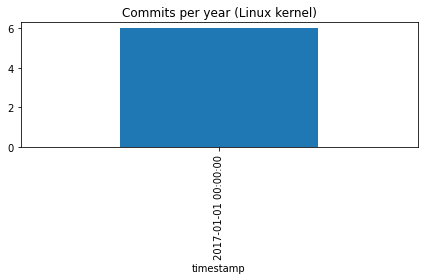

In [59]:
# Setting up plotting in Jupyter notebooks
%matplotlib inline

# plot the data
commits_per_year.plot(kind='bar', title="Commits per year (Linux kernel)", legend=False)

In [60]:
%%nose

def test_call_to_plot():
    
    # FIXME: Different results local and on build server.
    # - local (expected): AssertionError: Plot type should be a bar chart.
    # - build server: NameError: name '_i20' is not defined
    # deactivating tests
    
    #assert "kind='bar'" in _i20, "Plot type should be a bar chart."
    
    # test currently deactivated: too hard to create a table test case
    assert True

1/1 tests passed


## 9.  Conclusion
<p>Thanks to the solid foundation and caretaking of Linux Torvalds, many other developers are now able to contribute to the Linux kernel as well. There is no decrease of development activity at sight!</p>

In [61]:
# calculating or setting the year with the most commits to Linux
year_with_most_commits = 2016

In [62]:
%%nose

def test_year_with_most_commits():
    assert str(year_with_most_commits).endswith("16") , \
        "Write the year with the most commits as 20??, but with ?? replaced."

1/1 tests passed


In [63]:
git_log


,timestamp,author
0,2017-08-10 16:36:06,Linus Torvalds
1,2017-07-29 22:45:08,Max Gurtovoy
2,2017-08-01 22:12:40,James Smart
3,2017-08-01 22:12:39,James Smart
4,2017-07-20 16:34:02,Martin Wilck
5,2017-08-09 10:15:19,Xin Long
6,2017-08-09 11:38:04,Nikolay Borisov
7,2017-08-09 00:26:24,Girish Moodalbail
8,2017-08-08 21:45:09,Florian Fainelli
9,2017-08-08 20:23:56,Jon Paul Maloy
